## 梯度

### 导数：

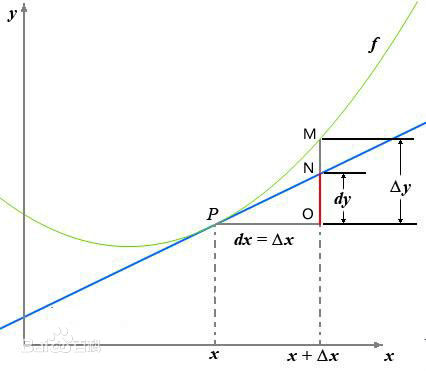

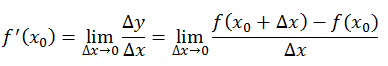

反映的是函数y=f(x)在某一点处沿**x轴正方向**的变化率。

### 偏导数：

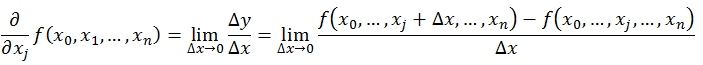
导数与偏导数本质是一致的，都是当自变量的变化量趋于0时，函数值的变化量与自变量变化量比值的极限。直观地说，偏导数指的是多元函数中，**函数y=f(x1,x2,…,xn)在某一点处沿某一坐标轴（x1,x2,…,xn）正方向的变化率。**

### 方向导数

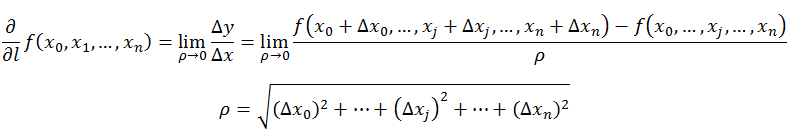

在前面导数和偏导数的定义中，均是沿坐标轴正方向讨论函数的变化率。那么当我们讨论函数沿任意方向的变化率时，也就引出了方向导数的定义，即：某一点在某一趋近方向上的导数值。

通俗的解释是：

我们不仅要知道函数在坐标轴正方向上的变化率（即偏导数），而且还要设法求得函数在其他特定方向上的变化率。而方向导数就是函数在其他特定方向上的变化率。

### 梯度

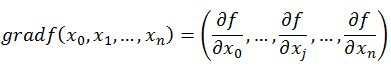

梯度的提出只为回答一个问题：

函数在变量空间的某一点处，沿着哪一个方向有最大的变化率？

梯度定义如下：

函数在某一点的梯度是这样一个向量，它的方向与取得最大方向导数的方向一致，而它的模为方向导数的最大值。

这里注意三点：
1. 梯度是一个向量，即有方向有大小；
2. 梯度的方向是最大方向导数的方向；
3. 梯度的值是最大方向导数的值。

## 广播
广播的规则：
* 让所有输入数组都向其中形状最长的数组看齐，形状中不足的部分都通过在前面
加1补齐。
* 输出数组的形状是输入数组形状的各个维度上的最大值。
* 如果输入数组的某个维度和输出数组的对应维度的长度相同或者其长度为1时，
这个数组能够用来计算，否则出错。
* 当输入数组的某个维度的长度为1时，沿着此维度运算时都用此维度上的第一组
值。

对于广播规则另一种简单理解
* 将两个数组的维度大小右对齐，然后比较对应维度上的数值，
* 如果数值相等或其中有一个为1或者为空，则能进行广播运算
* 输出的维度大小为取数值大的数值。否则不能进行数组运算。

## reshape
reshape(-1)是指变为一维向量

## unsqueeze()和squeeze()
unsqueeze在指定的维度上增加一个维度

squeeze在指定的维度上减少一个维度，但是只有维度为1时，才会真的减少

## 上采样和下采样
### 上采样
1. 概念

上采样（upsampling）：又名放大图像、图像插值；

主要目的是放大原图像,从而可以显示在更高分辨率的显示设备上；

上采样有3种常见的方法：双线性插值(bilinear)，反卷积(Transposed Convolution)，反池化(Unpooling)；

### 下采样
1. 概念

下采样（subsampled）：又名降采样、缩小图像；

主要目的有两个：1、使得图像符合显示区域的大小；2、生成对应图像的缩略图；

其实下采样就是池化

## 卷积和反卷积边长大小计算公式
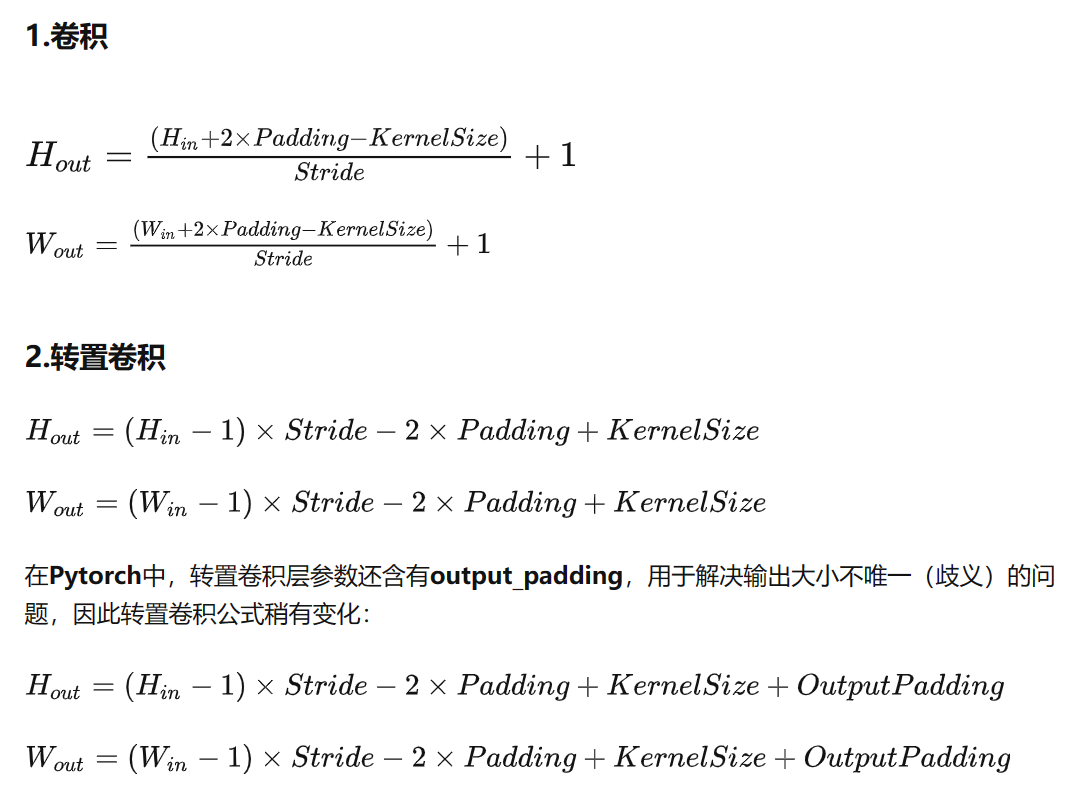

转置卷积即卷积公式的逆过程

## None
在 NumPy 或 PyTorch 中，None 是使用 np.newaxis 或 torch.unsqueeze 的语法糖。

```
import numpy as np

valid_len = np.array([1, 2, 3])
print(valid_len.shape)  # 输出 "(3,)"

# 添加一个新的轴
valid_len_new_axis = valid_len[:, None]
print(valid_len_new_axis.shape)  # 输出 "(3, 1)"
```

In [2]:
import torch
x = torch.tensor([1, 2, 3])
x.repeat_interleave(2)

tensor([1, 1, 2, 2, 3, 3])

In [3]:
y = torch.tensor([[1, 2], [3, 4]])
torch.repeat_interleave(y, 2)

tensor([1, 1, 2, 2, 3, 3, 4, 4])

In [4]:
torch.repeat_interleave(y,3,0)

tensor([[1, 2],
        [1, 2],
        [1, 2],
        [3, 4],
        [3, 4],
        [3, 4]])

In [5]:
torch.repeat_interleave(y, 3, dim=1)

tensor([[1, 1, 1, 2, 2, 2],
        [3, 3, 3, 4, 4, 4]])

In [6]:
torch.repeat_interleave(y, torch.tensor([1, 2]), dim=0)

tensor([[1, 2],
        [3, 4],
        [3, 4]])

## Norm

在 LayerNorm 和 BatchNorm1d 中，参数 normalized_shape 和 num_features 分别**指定了进行归一化的特征维度的大小**。这两个参数的设置方式略有不同。

1. LayerNorm(normalized_shape)：

normalized_shape 是一个整数或一个元组，用于指定输入张量的形状。对于1D数据，

normalized_shape 中只需要指定特征的数量（维度大小）。

例如，LayerNorm(normalized_shape=(3,)) 表示对于输入张量的每个样本，对包含3个特征的那个维度进行归一化。

2. BatchNorm1d(num_features)：

num_features 是一个整数，用于指定输入张量的特征数量（维度大小）。在 BatchNorm1d 中，**归一化是在每个特征的维度上进行的**。

例如，BatchNorm1d(num_features=3) 表示对输入张量的每个特征维度进行归一化，其中有3个特征。

在使用这两个归一化层时，你需要根据你的输入张量的形状和网络结构来选择适当的参数值。例如，对于一个形状为 (batch_size, num_features) 的输入张量，你可以选择 LayerNorm(normalized_shape=num_features) 或 BatchNorm1d(num_features=num_features)，具体取决于你想要应用归一化的维度。

### normalized_shape 是一个元组是什么意思

这个元组可以包含一个或多个整数值，具体取决于输入张量的维度。对于 LayerNorm 来说，这个参数指定了在哪个维度上进行归一化。

举个例子，考虑一个形状为 (batch_size, num_features, sequence_length) 的三维张量，其中 batch_size 是批处理大小，num_features 是每个时间步的特征数量，sequence_length 是时间步的数量。如果你想要在 num_features 维度上应用 Layer Normalization，你可以使用 normalized_shape=(num_features,)。

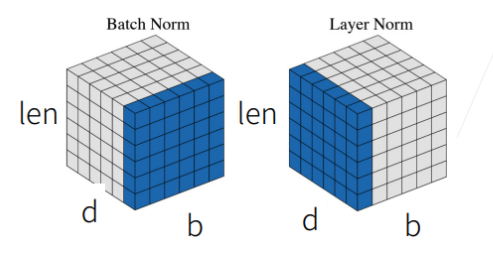

In [13]:
import torch
from torch import nn

# 三维张量 (batch_size, num_features, sequence_length)
input_tensor = torch.randn(2, 3, 4)
print(input_tensor)

# 在 num_features 维度上应用 Layer Normalization
layer_norm = nn.LayerNorm(normalized_shape=[3,4])
output = layer_norm(input_tensor)
output

tensor([[[-0.4536,  0.5458,  0.7256, -0.0447],
         [ 0.0623, -0.3943, -0.9737,  0.5598],
         [ 1.9293, -0.9193,  0.1159,  0.6204]],

        [[ 2.6077, -0.3465,  0.6004, -0.1934],
         [ 1.4300, -0.4212,  0.7296,  0.3699],
         [-0.1631, -1.0885,  1.3131,  2.4361]]])


tensor([[[-0.7788,  0.5154,  0.7482, -0.2492],
         [-0.1107, -0.7020, -1.4522,  0.5335],
         [ 2.3069, -1.3817, -0.0413,  0.6120]],

        [[ 1.8102, -0.8616, -0.0052, -0.7232],
         [ 0.7451, -0.9291,  0.1116, -0.2137],
         [-0.6958, -1.5327,  0.6394,  1.6550]]],
       grad_fn=<NativeLayerNormBackward0>)

## 花式索引

In [1]:
import numpy as np

X = np.array([[1, 2, 3, 4, 5],
              [6, 7, 8, 9, 10],
              [11, 12, 13, 14, 15],
              [16, 17, 18, 19, 20]])

In [2]:
X[1, 2]

8

In [3]:
X[1:3, 2:4]

array([[ 8,  9],
       [13, 14]])

In [4]:
X[X > 10]

array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

In [6]:
X[[1, 3], [2, 4]]   # 包含第二行第三列和第四行第五列的元素

array([ 8, 20])

In [8]:
X[[0,0,1,1], [2, 4,2,4]]  # 两个序列中的元素数量要相同，

array([ 3,  5,  8, 10])